In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import pyflux as pf
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [3]:
tsla_org = pd.read_csv("tsla.csv", sep=",")


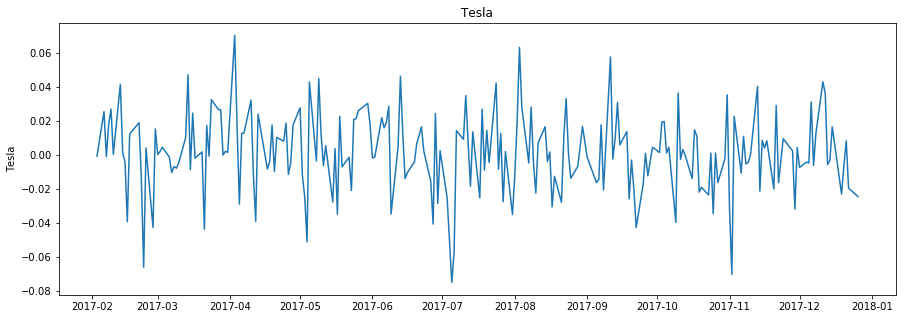

In [28]:
tsla = pd.DataFrame(np.diff(np.log(tsla_org['Adj Close']))[500:len(tsla_org['Adj Close'])-30])
tsla.index = pd.to_datetime(tsla_org['Date'].values[1+500:len(tsla_org)-30+1])
tsla.columns = ['AdjClose']
plt.figure(figsize=(15,5))
plt.plot(tsla)
plt.ylabel('Tesla')
plt.title('Tesla');

In [47]:
model = pf.GPNARX(data=tsla,ar=4, kernel=pf.SquaredExponential())
x = model.fit()
x.summary()

GPNARX(4)                                                                                                 
======================================================= ==================================================
Dependent Variable: AdjClose                            Method: MLE                                       
Start Date: 2017-02-09 00:00:00                         Log Likelihood: -297.8397                         
End Date: 2017-12-26 00:00:00                           AIC: 601.6795                                     
Number of observations: 222                             BIC: 611.8875                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Noise Sigma^2                            1.2709                                                           
l                                    

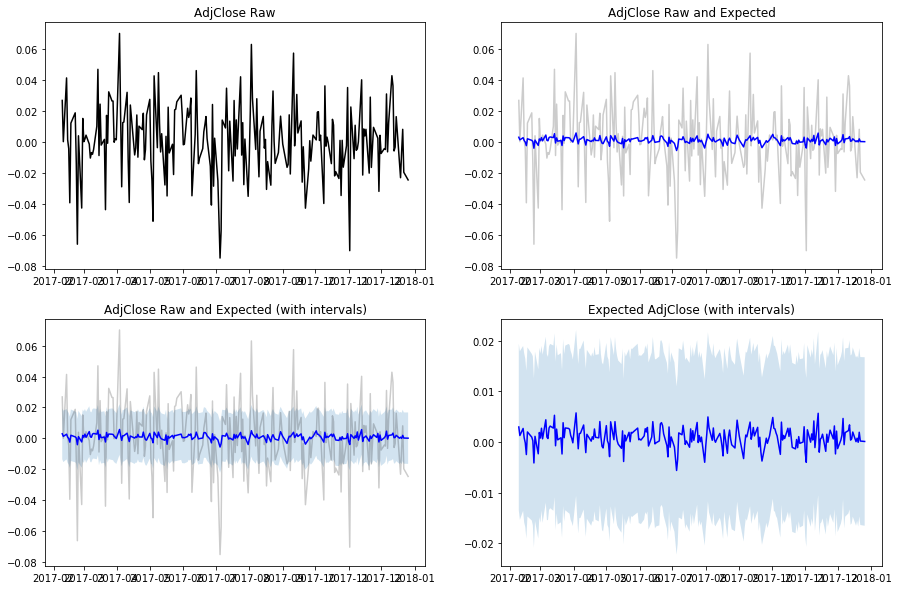

In [48]:
model.plot_fit(figsize=((15,10)))

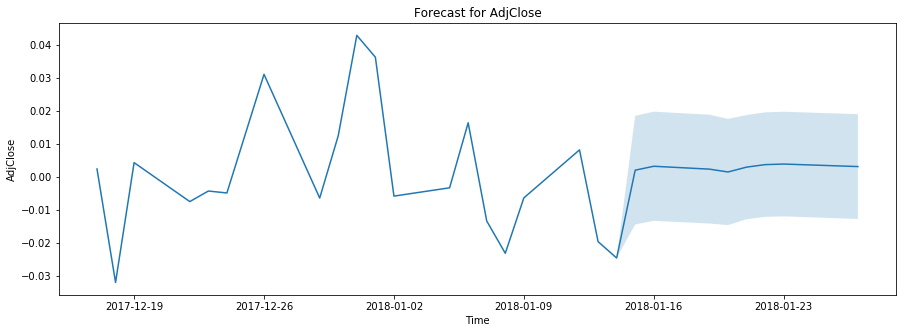

In [51]:
model.plot_predict(h=8,past_values=20,figsize=(15,5))